In [86]:
import h5py
import numpy as np


In [2]:

file_path = '/global/homes/a/abgulhan/WORKING/ml_converted/data-gm-year7-22-biweekly.hdf5'
f = h5py.File(file_path, 'r')

In [3]:
for name in f.keys():
    print(name)


forward_1
forward_10
forward_11
forward_12
forward_13
forward_14
forward_15
forward_16
forward_17
forward_18
forward_19
forward_2
forward_20
forward_21
forward_22
forward_23
forward_24
forward_25
forward_26
forward_27
forward_28
forward_29
forward_3
forward_30
forward_31
forward_32
forward_33
forward_34
forward_35
forward_36
forward_37
forward_38
forward_39
forward_4
forward_40
forward_41
forward_42
forward_43
forward_44
forward_45
forward_46
forward_47
forward_48
forward_49
forward_5
forward_50
forward_51
forward_52
forward_53
forward_54
forward_55
forward_56
forward_57
forward_58
forward_59
forward_6
forward_60
forward_61
forward_62
forward_63
forward_64
forward_65
forward_66
forward_67
forward_68
forward_7
forward_70
forward_71
forward_72
forward_73
forward_74
forward_75
forward_76
forward_77
forward_78
forward_79
forward_8
forward_80
forward_81
forward_82
forward_83
forward_84
forward_85
forward_87
forward_88
forward_89
forward_9
forward_90
forward_91
forward_92
forward_93
forward_

In [4]:
fwd = "forward_2"
print(f[fwd])
print(f[fwd].attrs)
print(f[fwd].shape)
print(f[fwd].dtype)

<HDF5 dataset "forward_2": shape (417, 60, 100, 100, 6), type "<f4">
<Attributes of HDF5 object at 139933996423728>
(417, 60, 100, 100, 6)
float32


In [5]:
print(f[fwd][..., 0])

[[[[-1.e+34 -1.e+34 -1.e+34 ... -1.e+34 -1.e+34 -1.e+34]
   [-1.e+34 -1.e+34 -1.e+34 ... -1.e+34 -1.e+34 -1.e+34]
   [-1.e+34 -1.e+34 -1.e+34 ... -1.e+34 -1.e+34 -1.e+34]
   ...
   [-1.e+34 -1.e+34 -1.e+34 ... -1.e+34 -1.e+34 -1.e+34]
   [-1.e+34 -1.e+34 -1.e+34 ... -1.e+34 -1.e+34 -1.e+34]
   [-1.e+34 -1.e+34 -1.e+34 ... -1.e+34 -1.e+34 -1.e+34]]

  [[-1.e+34 -1.e+34 -1.e+34 ... -1.e+34 -1.e+34 -1.e+34]
   [-1.e+34 -1.e+34 -1.e+34 ... -1.e+34 -1.e+34 -1.e+34]
   [-1.e+34 -1.e+34 -1.e+34 ... -1.e+34 -1.e+34 -1.e+34]
   ...
   [-1.e+34 -1.e+34 -1.e+34 ... -1.e+34 -1.e+34 -1.e+34]
   [-1.e+34 -1.e+34 -1.e+34 ... -1.e+34 -1.e+34 -1.e+34]
   [-1.e+34 -1.e+34 -1.e+34 ... -1.e+34 -1.e+34 -1.e+34]]

  [[-1.e+34 -1.e+34 -1.e+34 ... -1.e+34 -1.e+34 -1.e+34]
   [-1.e+34 -1.e+34 -1.e+34 ... -1.e+34 -1.e+34 -1.e+34]
   [-1.e+34 -1.e+34 -1.e+34 ... -1.e+34 -1.e+34 -1.e+34]
   ...
   [-1.e+34 -1.e+34 -1.e+34 ... -1.e+34 -1.e+34 -1.e+34]
   [-1.e+34 -1.e+34 -1.e+34 ... -1.e+34 -1.e+34 -1.e+34]
   [-1

In [6]:
fwd1 = "forward_1"
fwd2 = "forward_2"

print(f[fwd1] == f[fwd2])

False


In [7]:
f[fwd].shape

(417, 60, 100, 100, 6)

In [8]:
import numpy as np

#the list of variables of size (time_step, z=60, y=100, x=100, parameters=6)
var_list=['timeDaily_avg_layerThickness',
 'timeDaily_avg_velocityZonal',
 'timeDaily_avg_velocityMeridional',
 'timeDaily_avg_activeTracers_temperature',
 'timeDaily_avg_activeTracers_salinity',
 'var_x'] # for f[fwd][..., 5], all values are same


In [9]:
def clean_outliers(data, threshold=1e30):
    """
    Clean outliers in the data by replacing values greater than the threshold with NaN.
    """
    data = np.where(np.abs(data) > threshold, np.nan, data)
    return data

In [ ]:

# Calculate and check invariants across time steps

# Get arrays for each variable
depth = clean_outliers(f[fwd][..., 0])  # timeDaily_avg_layerThickness
vel_zonal = clean_outliers(f[fwd][..., 1])  # timeDaily_avg_velocityZonal
vel_merid = clean_outliers(f[fwd][..., 2])  # timeDaily_avg_velocityMeridional
temperature = clean_outliers(f[fwd][..., 3])  # timeDaily_avg_activeTracers_temperature
salinity = clean_outliers(f[fwd][..., 4])  # timeDaily_avg_activeTracers_salinity

# Total volume per time step
total_volume = np.nansum(depth, axis=(1,2,3))

# Total salinity per time step
total_salt = np.nansum(salinity * depth, axis=(1,2,3))

# Total temperature per time step
total_temperature = np.nansum(temperature * depth, axis=(1,2,3))

# Total velocity per time step (sum of magnitudes)
total_velocity = np.nansum(np.sqrt(vel_zonal**2 + vel_merid**2), axis=(1,2,3))

# Total kinetic energy per time step
total_kinetic_energy = np.nansum(0.5 * (vel_zonal**2 + vel_merid**2) * depth, axis=(1,2,3))

g = 9.81  # gravitational acceleration in m/s^2

# Compute potential energy: PE = g * sum(depth * z * cell_area)
# Assume uniform grid spacing in z, y, x
nz, ny, nx = depth.shape[1:4]
# z coordinate: center of each layer, for each (time, y, x) point
# thickness is (time, z, y, x)
# z_edges: cumulative sum of thicknesses along z, starting from 0
z_edges = np.concatenate(
    [np.zeros_like(depth[:, :1, ...]), np.cumsum(depth, axis=1)], axis=1
)  # shape: (time, z+1, y, x)
z_centers = 0.5 * (z_edges[:, :-1, ...] + z_edges[:, 1:, ...])  # (time, z, y, x)

# Remove any NaNs in z_centers that may arise from cumulative sum
z_centers = np.where(np.isnan(z_centers), 0, z_centers)

# Potential energy per time step (sum over z, y, x)
total_potential_energy = np.nansum(g * depth * z_centers, axis=(1,2,3))

def print_stats(name, arr):
    min_val = np.nanmin(arr)
    max_val = np.nanmax(arr)
    mean_val = np.nanmean(arr)
    std_val = np.nanstd(arr)
    # Percentage difference between min and max relative to mean
    if mean_val != 0:
        pct_diff = 100 * (max_val - min_val) / mean_val
    else:
        pct_diff = np.nan
    print(f"{name}:")
    print(f"  min: {min_val}, max: {max_val}, mean: {mean_val}, std: {std_val}")
    print(f"  percentage difference (max-min)/mean: {pct_diff:.6f}%")

print_stats("Total volume", total_volume)
print_stats("Total salinity", total_salt)
print_stats("Total temperature", total_temperature)
print_stats("Total velocity", total_velocity)
print_stats("Total kinetic energy", total_kinetic_energy)
print_stats("Total potential energy", total_potential_energy)
print_stats("Total energy (kinetic + potential)", total_kinetic_energy + total_potential_energy)


Total volume:
  min: 12951666.0, max: 12951690.0, mean: 12951680.0, std: 4.625546932220459
  percentage difference (max-min)/mean: 0.000185%
Total salinity:
  min: 452049920.0, max: 452050784.0, mean: 452050368.0, std: 191.55824279785156
  percentage difference (max-min)/mean: 0.000191%
Total temperature:
  min: 32719970.0, max: 32811220.0, mean: 32773354.0, std: 24047.91015625
  percentage difference (max-min)/mean: 0.278427%
Total velocity:
  min: 28270.232421875, max: 30863.3828125, mean: 29614.33984375, std: 617.7592163085938
  percentage difference (max-min)/mean: 8.756401%
Total kinetic energy:
  min: 46869.5078125, max: 53164.30859375, mean: 49488.19140625, std: 1290.3905029296875
  percentage difference (max-min)/mean: 12.719804%
Total potential energy:
  min: 143229468672.0, max: 143230418944.0, mean: 143229943808.0, std: 182342.15625
  percentage difference (max-min)/mean: 0.000663%
Total energy (kinetic + potential):
  min: 143229517824.0, max: 143230468096.0, mean: 14322999

In [ ]:
import numpy as np
import matplotlib.colors as mcolors

class MidpointFocusNorm(mcolors.Normalize):
    def __init__(self, vmin, vmax, midpoint=0.5, gamma=0.3, emphasis_below=True, clip=False):
        """
        Custom normalization with proper below-midpoint emphasis.
        
        Args:
            vmin/vmax: Data range
            midpoint: Target value (0.0-1.0 normalized)
            gamma: Emphasis strength (lower = more emphasis)
            emphasis_below: Emphasize values below midpoint
        """
        self.midpoint = midpoint
        self.gamma = gamma
        self.emphasis_below = emphasis_below
        super().__init__(vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # Normalize data to [0,1] range
        x = (value - self.vmin) / (self.vmax - self.vmin)
        
        # Handle special cases
        if self.midpoint <= 0 or self.midpoint >= 1:
            return x ** self.gamma
        
        # Apply proper transformation for below-midpoint emphasis
        if self.emphasis_below:
            # CORRECTED TRANSFORMATION
            with np.errstate(invalid='ignore'):
                return np.where(
                    x < self.midpoint,
                    (x / self.midpoint) ** self.gamma,  # FIXED: Use gamma directly
                    (x - self.midpoint) / (1 - self.midpoint) * (1 - self.midpoint**self.gamma) + self.midpoint**self.gamma
                )
        else:
            # Original around-midpoint transformation
            with np.errstate(invalid='ignore'):
                return np.where(
                    x < self.midpoint,
                    0.5 * (x / self.midpoint) ** self.gamma,
                    1 - 0.5 * ((1 - x) / (1 - self.midpoint)) ** self.gamma
                )


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Extract velocity data
vel_zonal = clean_outliers(f[fwd][..., 1])  # timeDaily_avg_velocityZonal
vel_merid = clean_outliers(f[fwd][..., 2])  # timeDaily_avg_velocityMeridional

# Average over depth layers
layer_start = 0
layer_end = 10
u_avg = np.nanmean(vel_zonal[:, layer_start:layer_end], axis=1)
v_avg = np.nanmean(vel_merid[:, layer_start:layer_end], axis=1)

# Get correct spatial dimensions
time_steps, y_size, x_size = u_avg.shape

# Use already defined v_avg, x_size, y_size
# If you have u_avg already defined, use it here. Otherwise, set u_avg = np.zeros_like(v_avg)
try:
    u_avg
except NameError:
    u_avg = np.zeros_like(v_avg)

time_steps, y_size, x_size = u_avg.shape


/tmp/ipykernel_1482973/189500588.py:12: RuntimeWarning: Mean of empty slice
  u_avg = np.nanmean(vel_zonal[:, layer_start:layer_end], axis=1)
/tmp/ipykernel_1482973/189500588.py:13: RuntimeWarning: Mean of empty slice
  v_avg = np.nanmean(vel_merid[:, layer_start:layer_end], axis=1)


In [ ]:

import matplotlib.colors as mcolors

def make_animation(total_frames=None, midpoint=0.0, colorbar_gamma=0.3, cmap='viridis', emphasize_below=False):
    """Make animation with frame count control and optional colorbar gamma scaling.

    Args:
        total_frames (int or None): Number of frames to animate.
        colorbar_gamma (float): Gamma correction for colorbar sensitivity. 
                                <1.0 increases sensitivity to small values.
    """
    # Determine frames to use
    if total_frames is None or total_frames <= 0 or total_frames > time_steps:
        frames_to_use = time_steps
    else:
        frames_to_use = total_frames

    # Construct spatial grid
    x, y = np.meshgrid(np.arange(x_size), np.arange(y_size))

    # Subsample for cleaner visualization
    subsample = 3
    x_sub = x[::subsample, ::subsample]
    y_sub = y[::subsample, ::subsample]

    # Subsample velocities
    u_sub = np.zeros((frames_to_use, y_sub.shape[0], y_sub.shape[1]))
    v_sub = np.zeros((frames_to_use, y_sub.shape[0], y_sub.shape[1]))

    for t in range(frames_to_use):
        u_sub[t] = u_avg[t, ::subsample, ::subsample]
        v_sub[t] = v_avg[t, ::subsample, ::subsample]

    fig, ax = plt.subplots(figsize=(14, 10))
    ax.set_ylim(y_size, 0)  # Invert y-axis for correct orientation
    ax.set_xlim(0, x_size)
    ax.set_ylim(0, y_size)
    ax.set_aspect('equal')
    ax.set_title("Ocean Current Velocity", fontsize=16)
    ax.set_xlabel("X Position", fontsize=12)
    ax.set_ylabel("Y Position", fontsize=12)

    # Set colorbar limits based on all frames for consistency
    all_speeds = np.sqrt(u_sub**2 + v_sub**2)
    vmin = np.nanmin(all_speeds)
    vmax = np.nanmax(all_speeds)

    # # Use PowerNorm for gamma correction in color mapping, not in data
    # if colorbar_gamma != 1.0:
    #     norm = mcolors.PowerNorm(gamma=colorbar_gamma, vmin=vmin, vmax=vmax)
    # else:
    #     norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
        
    # Apply custom normalization
    norm = MidpointFocusNorm(
        vmin=vmin, 
        vmax=vmax, 
        midpoint=midpoint, 
        gamma=colorbar_gamma,
        emphasis_below=emphasize_below
    )

    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=norm), ax=ax)
    cbar.set_label(f'Current Speed (m/s)', fontsize=12)

    def update(frame):
        # Clear the axis for the new frame
        ax.cla()
        ax.set_ylim(y_size, 0)  # Invert y-axis for correct orientation
        ax.set_xlim(0, x_size)
        ax.set_ylim(0, y_size)
        ax.set_aspect('equal')
        ax.set_xlabel("X Position", fontsize=12)
        ax.set_ylabel("Y Position", fontsize=12)

        # Calculate current speed for color mapping (no gamma applied to data)
        current_speed = np.sqrt(u_sub[frame]**2 + v_sub[frame]**2)

        # Draw new streamlines
        strm = ax.streamplot(
            x_sub, y_sub, u_sub[frame], v_sub[frame],
            color=current_speed,
            cmap=cmap,
            linewidth=2,
            density=3,
            arrowsize=1.5,
            norm=norm
        )
        ax.set_title(f"Ocean Current Velocity (Frame: {frame+1}/{frames_to_use})", fontsize=16)
        return strm.lines,

    ani = animation.FuncAnimation(
        fig,
        update,
        frames=frames_to_use,
        interval=100,  # 10 FPS
        blit=True
    )
    
    # Save animation
    output_dir = 'figures'
    output_file = f'{output_dir}/curved_ocean_currents_{frames_to_use}frames_{cmap}_gamma{colorbar_gamma}_point{midpoint}.gif'
    ani.save(output_file,
             writer='pillow',
             fps=10,
             dpi=150,
             bitrate=1800)
    plt.close(fig)
    print(f"Saved {frames_to_use}-frame animation: {output_file}")
    if frames_to_use == 1:
        return fig

Saved 1-frame animation: figures/curved_ocean_currents_1frames_rainbow_gamma1.0_point0.15.gif


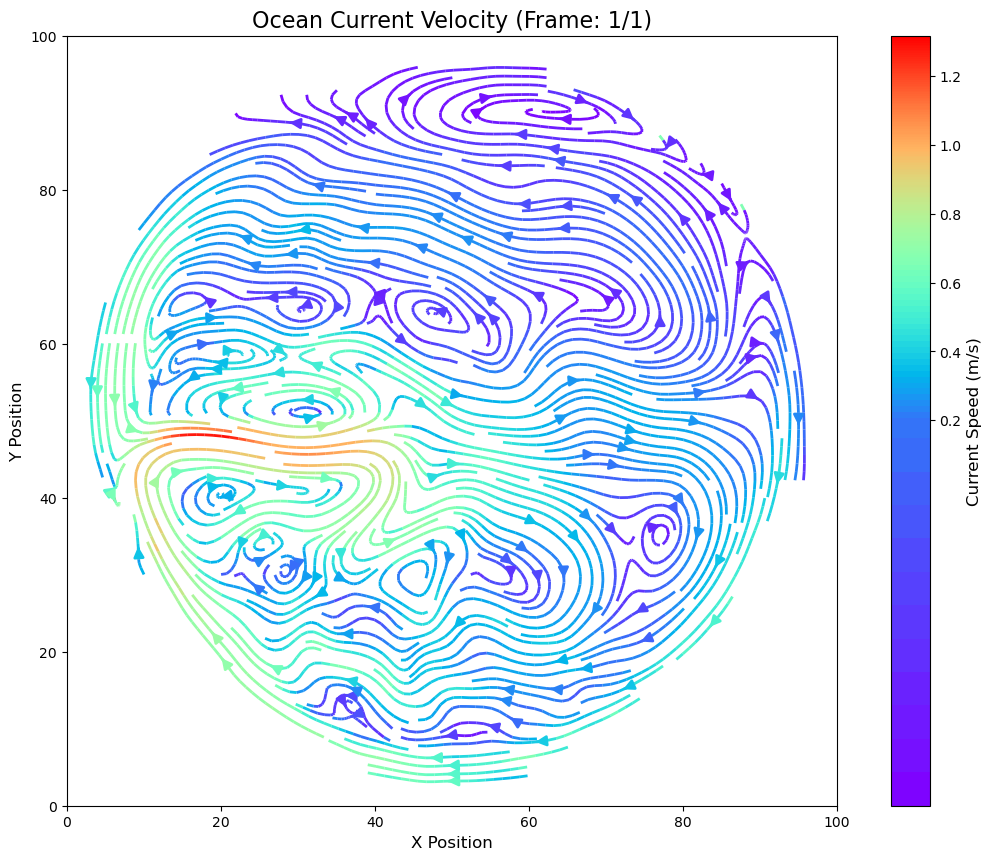

In [85]:

# Example usage:
# For more sensitivity to small values, use colorbar_gamma=0.5 (default is 1.0, i.e., no correction)
make_animation(1, colorbar_gamma=1.0, midpoint=0.15, cmap='rainbow') 


In [62]:
gammas= [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
midpoint=0.1  # Midpoint for emphasis in normalization
for g in gammas:
    make_animation(1, colorbar_gamma=g, midpoint=midpoint, cmap='rainbow')  # Save 10 frames with different gamma values

Saved 1-frame animation: figures/curved_ocean_currents_1frames_rainbow_gamma0.5_point0.1.gif
Saved 1-frame animation: figures/curved_ocean_currents_1frames_rainbow_gamma0.6_point0.1.gif
Saved 1-frame animation: figures/curved_ocean_currents_1frames_rainbow_gamma0.7_point0.1.gif
Saved 1-frame animation: figures/curved_ocean_currents_1frames_rainbow_gamma0.8_point0.1.gif
Saved 1-frame animation: figures/curved_ocean_currents_1frames_rainbow_gamma0.9_point0.1.gif
Saved 1-frame animation: figures/curved_ocean_currents_1frames_rainbow_gamma1.0_point0.1.gif


In [55]:
gamma= 0.5
midpoints= [0.10, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2]  # Midpoint for emphasis in normalization
for m in midpoints:
    make_animation(1, colorbar_gamma=gamma, midpoint=m, cmap='hsv_r', emphasize_below=True)  # Save 10 frames with different gamma values

Saved 1-frame animation: figures/curved_ocean_currents_1frames_hsv_r_gamma0.5_point0.1.gif
Saved 1-frame animation: figures/curved_ocean_currents_1frames_hsv_r_gamma0.5_point0.11.gif
Saved 1-frame animation: figures/curved_ocean_currents_1frames_hsv_r_gamma0.5_point0.12.gif
Saved 1-frame animation: figures/curved_ocean_currents_1frames_hsv_r_gamma0.5_point0.13.gif
Saved 1-frame animation: figures/curved_ocean_currents_1frames_hsv_r_gamma0.5_point0.14.gif
Saved 1-frame animation: figures/curved_ocean_currents_1frames_hsv_r_gamma0.5_point0.15.gif
Saved 1-frame animation: figures/curved_ocean_currents_1frames_hsv_r_gamma0.5_point0.16.gif
Saved 1-frame animation: figures/curved_ocean_currents_1frames_hsv_r_gamma0.5_point0.17.gif
Saved 1-frame animation: figures/curved_ocean_currents_1frames_hsv_r_gamma0.5_point0.18.gif
Saved 1-frame animation: figures/curved_ocean_currents_1frames_hsv_r_gamma0.5_point0.19.gif
Saved 1-frame animation: figures/curved_ocean_currents_1frames_hsv_r_gamma0.5_poi

In [26]:
make_animation(1, colorbar_gamma=0.5, midpoint=0.15, cmap='hsv_r')  # Save 10 frames with different gamma values

/tmp/ipykernel_1482973/2681026929.py:27: RuntimeWarning: invalid value encountered in sqrt
  0.5 * (x / self.midpoint) ** self.gamma,
/tmp/ipykernel_1482973/2681026929.py:28: RuntimeWarning: invalid value encountered in sqrt
  1 - 0.5 * ((1 - x) / (1 - self.midpoint)) ** self.gamma
/tmp/ipykernel_1482973/2681026929.py:27: RuntimeWarning: invalid value encountered in sqrt
  0.5 * (x / self.midpoint) ** self.gamma,
/tmp/ipykernel_1482973/2681026929.py:28: RuntimeWarning: invalid value encountered in sqrt
  1 - 0.5 * ((1 - x) / (1 - self.midpoint)) ** self.gamma


Saved 1-frame animation: figures/curved_ocean_currents_1frames_hsv_r_gamma0.5_point0.15.gif


In [131]:
import matplotlib.colors as mcolors

# If you have not defined MidpointFocusNorm elsewhere, add a dummy fallback to avoid NameError
try:
    MidpointFocusNorm
except NameError:
    class MidpointFocusNorm(mcolors.Normalize):
        def __init__(self, vmin=None, vmax=None, midpoint=None, gamma=1.0, emphasis_below=False, clip=False):
            super().__init__(vmin, vmax, clip)
            self.midpoint = midpoint
            self.gamma = gamma
            self.emphasis_below = emphasis_below
        def __call__(self, value, clip=None):
            # Simple normalization fallback
            return super().__call__(value, clip)

def make_images(total_frames=None, midpoint=0.0, colorbar_gamma=0.3, cmap='viridis', emphasize_below=False, frame_start=0, frame_end=None, save_images=True, image_dir='figures/images'):
    """Make animation with frame count control and optional colorbar gamma scaling.
    Optionally, save images for a range of frames.

    Args:
        total_frames (int or None): Number of frames to animate.
        colorbar_gamma (float): Gamma correction for colorbar sensitivity. 
                                <1.0 increases sensitivity to small values.
        frame_start (int): First frame to output image for (inclusive).
        frame_end (int or None): Last frame to output image for (exclusive).
        save_images (bool): If True, save images for the specified frame range.
        image_dir (str): Directory to save images.
    """
    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib.animation as animation
    import os

    # Determine frames to use
    if total_frames is None or total_frames <= 0 or total_frames > time_steps:
        frames_to_use = time_steps
    else:
        frames_to_use = total_frames

    # Construct spatial grid
    x, y = np.meshgrid(np.arange(x_size), np.arange(y_size))

    # Subsample for cleaner visualization
    subsample = 3
    x_sub = x[::subsample, ::subsample]
    y_sub = y[::subsample, ::subsample]

    # Subsample velocities
    u_sub = np.zeros((frames_to_use, y_sub.shape[0], y_sub.shape[1]))
    v_sub = np.zeros((frames_to_use, y_sub.shape[0], y_sub.shape[1]))

    for t in range(frames_to_use):
        u_sub[t] = u_avg[t, ::subsample, ::subsample]
        v_sub[t] = v_avg[t, ::subsample, ::subsample]

    fig, ax = plt.subplots(figsize=(14, 10))
    # Increase font sizes globally for all text elements
    plt.rcParams.update({'font.size': 22, 'axes.titlesize': 28, 'axes.labelsize': 24, 'xtick.labelsize': 20, 'ytick.labelsize': 20})

    ax.set_ylim(y_size, 0)  # Invert y-axis for correct orientation
    ax.set_xlim(0, x_size)
    ax.set_ylim(0, y_size)
    ax.set_aspect('equal')
    ax.set_title("Ocean Current Velocity", fontsize=28)
    ax.set_xlabel("X Position", fontsize=24)
    ax.set_ylabel("Y Position", fontsize=24)

    # Set colorbar limits based on all frames for consistency
    all_speeds = np.sqrt(u_sub**2 + v_sub**2)
    vmin = np.nanmin(all_speeds)
    vmax = np.nanmax(all_speeds)

    # Apply custom normalization
    norm = MidpointFocusNorm(
        vmin=vmin, 
        vmax=vmax, 
        midpoint=midpoint, 
        gamma=colorbar_gamma,
        emphasis_below=emphasize_below
    )

    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=norm), ax=ax)
    cbar.set_label(f'Current Speed (m/s)', fontsize=24)
    cbar.ax.tick_params(labelsize=20)

    def plot_frame(frame, ax):
        ax.cla()
        ax.set_ylim(y_size, 0)  # Invert y-axis for correct orientation
        ax.set_xlim(0, x_size)
        ax.set_ylim(0, y_size)
        ax.set_aspect('equal')
        ax.set_xlabel("X Position", fontsize=24)
        ax.set_ylabel("Y Position", fontsize=24)
        current_speed = np.sqrt(u_sub[frame]**2 + v_sub[frame]**2)
        strm = ax.streamplot(
            x_sub, y_sub, u_sub[frame], v_sub[frame],
            color=current_speed,
            cmap=cmap,
            linewidth=2,
            density=3.25,
            arrowsize=1.75,
            arrowstyle='fancy', # Use a more visually appealing arrow style
            norm=norm
        )
        ax.set_title(f"Ocean Current Velocity", fontsize=28)
        return strm.lines,

    def update(frame):
        return plot_frame(frame, ax)

    # Save images for a range of frames if requested
    if save_images:
        if not os.path.exists(image_dir):
            os.makedirs(image_dir)
        if frame_end is None or frame_end > frames_to_use:
            frame_end = frames_to_use
        for frame in range(frame_start, frame_end):
            plot_frame(frame, ax)
            img_path = os.path.join(image_dir, f"frame_{frame:04d}.png")
            plt.savefig(img_path, dpi=150)
            # Also save as PDF
            pdf_path = os.path.join(image_dir, f"frame_{frame:04d}.pdf")
            plt.savefig(pdf_path, dpi=150, format='pdf')
        plt.close(fig)
        print(f"Saved images for frames {frame_start} to {frame_end-1} in {image_dir} (PNG and PDF)")
        return

    


In [132]:
make_images(10, colorbar_gamma=1.0, midpoint=0.15, cmap='rainbow') 


Saved images for frames 0 to 9 in figures/images (PNG and PDF)


In [107]:
import matplotlib.colors as mcolors
import matplotlib.cm as cm

# If you have not defined MidpointFocusNorm elsewhere, add a dummy fallback to avoid NameError
try:
    MidpointFocusNorm
except NameError:
    class MidpointFocusNorm(mcolors.Normalize):
        def __init__(self, vmin=None, vmax=None, midpoint=None, gamma=1.0, emphasis_below=False, clip=False):
            super().__init__(vmin, vmax, clip)
            self.midpoint = midpoint
            self.gamma = gamma
            self.emphasis_below = emphasis_below
        def __call__(self, value, clip=None):
            # Simple normalization fallback
            return super().__call__(value, clip)

class CompressedNorm(mcolors.Normalize):
    """Custom normalization that compresses values below a threshold for uniform colorbar spacing"""
    def __init__(self, vmin=None, vmax=None, threshold=0.2, compression_factor=0.15):
        super().__init__(vmin, vmax)
        self.threshold = threshold
        self.compression_factor = compression_factor
    
    def __call__(self, value, clip=None):
        import numpy as np
        # Normalize to 0-1 range first
        normalized = (np.asarray(value) - self.vmin) / (self.vmax - self.vmin)
        
        # Apply compression below threshold
        compressed = np.where(
            normalized < self.threshold,
            normalized * self.compression_factor / self.threshold,
            self.compression_factor + (normalized - self.threshold) * (1 - self.compression_factor) / (1 - self.threshold)
        )
        return np.ma.masked_array(compressed)

def make_images2(total_frames=None, midpoint=0.0, colorbar_gamma=0.3, cmap='viridis', 
                emphasize_below=False, frame_start=0, frame_end=None, save_images=True, 
                image_dir='figures/images', uniform_colorbar=True, compression_threshold=0.2):
    """Make animation with frame count control and optional colorbar gamma scaling.
    Optionally, save images for a range of frames.

    Args:
        total_frames (int or None): Number of frames to animate.
        colorbar_gamma (float): Gamma correction for colorbar sensitivity. 
                                <1.0 increases sensitivity to small values.
        frame_start (int): First frame to output image for (inclusive).
        frame_end (int or None): Last frame to output image for (exclusive).
        save_images (bool): If True, save images for the specified frame range.
        image_dir (str): Directory to save images.
        uniform_colorbar (bool): If True, compress lower values for uniform tick spacing.
        compression_threshold (float): Values below this fraction of range get compressed.
    """
    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib.animation as animation
    import os

    # Determine frames to use
    if total_frames is None or total_frames <= 0 or total_frames > time_steps:
        frames_to_use = time_steps
    else:
        frames_to_use = total_frames

    # Construct spatial grid
    x, y = np.meshgrid(np.arange(x_size), np.arange(y_size))

    # Subsample for cleaner visualization
    subsample = 3
    x_sub = x[::subsample, ::subsample]
    y_sub = y[::subsample, ::subsample]

    # Subsample velocities
    u_sub = np.zeros((frames_to_use, y_sub.shape[0], y_sub.shape[1]))
    v_sub = np.zeros((frames_to_use, y_sub.shape[0], y_sub.shape[1]))

    for t in range(frames_to_use):
        u_sub[t] = u_avg[t, ::subsample, ::subsample]
        v_sub[t] = v_avg[t, ::subsample, ::subsample]

    fig, ax = plt.subplots(figsize=(14, 10))
    # Increase font sizes globally for all text elements
    plt.rcParams.update({'font.size': 22, 'axes.titlesize': 28, 'axes.labelsize': 24, 'xtick.labelsize': 20, 'ytick.labelsize': 20})

    ax.set_ylim(y_size, 0)  # Invert y-axis for correct orientation
    ax.set_xlim(0, x_size)
    ax.set_ylim(0, y_size)
    ax.set_aspect('equal')
    ax.set_title("Ocean Current Velocity", fontsize=28)
    ax.set_xlabel("X Position", fontsize=24)
    ax.set_ylabel("Y Position", fontsize=24)

    # Set colorbar limits based on all frames for consistency
    all_speeds = np.sqrt(u_sub**2 + v_sub**2)
    vmin = np.nanmin(all_speeds)
    vmax = np.nanmax(all_speeds)

    # Normalization for the plot (keeps original colors)
    plot_norm = MidpointFocusNorm(
        vmin=vmin, 
        vmax=vmax, 
        midpoint=midpoint, 
        gamma=colorbar_gamma,
        emphasis_below=emphasize_below
    )
    
    # Separate normalization for colorbar (uniform spacing)
    if uniform_colorbar:
        # Calculate threshold as fraction of data range
        threshold_value = vmin + compression_threshold * (vmax - vmin)
        colorbar_norm = CompressedNorm(
            vmin=vmin, 
            vmax=vmax, 
            threshold=compression_threshold,  # Fraction of normalized range
            compression_factor=0.15  # 15% of colorbar for values below threshold
        )
        
        # Create colorbar with separate normalization
        sm = cm.ScalarMappable(cmap=cmap, norm=colorbar_norm)
        sm.set_array([])
        cbar = fig.colorbar(sm, ax=ax)
        
        # Set uniform tick spacing
        num_ticks = 8
        tick_values = np.linspace(vmin, vmax, num_ticks)
        # Transform tick values to colorbar space and set them
        colorbar_tick_positions = colorbar_norm(tick_values)
        cbar.set_ticks(colorbar_tick_positions)
        cbar.set_ticklabels([f'{val:.2f}' for val in tick_values])
        
    else:
        # Use same normalization as plot
        cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=plot_norm), ax=ax)
    
    cbar.set_label(f'Current Speed (m/s)', fontsize=24)
    cbar.ax.tick_params(labelsize=20)

    def plot_frame(frame, ax):
        ax.cla()
        ax.set_ylim(y_size, 0)  # Invert y-axis for correct orientation
        ax.set_xlim(0, x_size)
        ax.set_ylim(0, y_size)
        ax.set_aspect('equal')
        ax.set_xlabel("X Position", fontsize=24)
        ax.set_ylabel("Y Position", fontsize=24)
        current_speed = np.sqrt(u_sub[frame]**2 + v_sub[frame]**2)
        
        # Use PLOT normalization to preserve original colors
        strm = ax.streamplot(
            x_sub, y_sub, u_sub[frame], v_sub[frame],
            color=current_speed,
            cmap=cmap,
            linewidth=2,
            density=3,
            arrowsize=1.5,
            norm=plot_norm  # Use original normalization for plot
        )
        ax.set_title(f"Ocean Current Velocity", fontsize=28)
        return strm.lines,

    def update(frame):
        return plot_frame(frame, ax)

    # Save images for a range of frames if requested
    if save_images:
        if not os.path.exists(image_dir):
            os.makedirs(image_dir)
        if frame_end is None or frame_end > frames_to_use:
            frame_end = frames_to_use
        for frame in range(frame_start, frame_end):
            plot_frame(frame, ax)
            uniform_suffix = "_uniform" if uniform_colorbar else ""
            img_path = os.path.join(image_dir, f"frame_{frame:04d}{uniform_suffix}.png")
            plt.savefig(img_path, dpi=150, bbox_inches='tight')
        plt.close(fig)
        print(f"Saved images for frames {frame_start} to {frame_end-1} in {image_dir}")
        return


In [108]:
make_images2(10, colorbar_gamma=1.0, midpoint=0.15, cmap='rainbow') 


Saved images for frames 0 to 9 in figures/images
